In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cross entropy loss function
\begin{equation}
H(y, \hat{y}) = \frac{1}{N}\sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
\end{equation}

Gradiant of loss compare to weight and bias
\begin{equation}
\frac{dH}{dw} = \frac{1}{N}\sum 2x_{i}(\hat{y} - y_{i})
\end{equation}

\begin{equation}
\frac{dH}{db} = \frac{1}{N}\sum 2(\hat{y} - y_{i})
\end{equation}

In [2]:
np.random.seed(0)

# Number of data points
num_samples = 50

# Generate random values for the feature X
X_0 = np.random.uniform(-5, 1, num_samples)
Y_0 = [0]*num_samples

X_1 = np.random.uniform(-1, 5, num_samples)
Y_1 = [1]*num_samples

X = np.concatenate((X_0, X_1))
Y = np.concatenate((Y_0, Y_1))

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

# Create a DataFrame to store the data
data = pd.DataFrame({'X': X, 'Y': Y})

# Display the first few rows of the generated data
data


,X,Y
0,-0.004281,0
1,4.027669,1
2,2.629073,1
3,0.781977,0
4,-1.707119,0
...,...,...
95,-2.842953,0
96,0.553580,0
97,0.736437,1
98,-1.730701,0


(-0.1, 1.1)

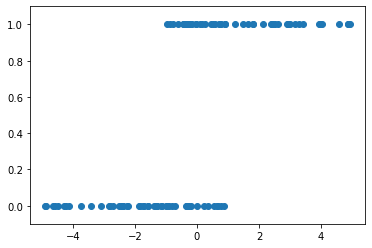

In [27]:
dum = np.linspace(-5, 5, 2)

plt.plot(X, Y, 'o')
# plt.plot(dum, 0.2*dum+0.5, 'r--')
plt.ylim(-0.1, 1.1)

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

NameError: name 'LogisticRegression' is not defined

In [7]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

0.9210526315789473


In [12]:
np.random.seed(0)

# Number of data points
num_samples = 50

# Generate random values for the feature X
X_0 = np.random.uniform(-5, 1, num_samples)
Y_0 = [0]*num_samples

X_1 = np.random.uniform(-1, 5, num_samples)
Y_1 = [1]*num_samples

X = np.concatenate((X_0, X_1))
Y = np.concatenate((Y_0, Y_1))

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

# Create a DataFrame to store the data
data = pd.DataFrame({'X': X, 'Y': Y})

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

ValueError: shapes (80,) and (1,) not aligned: 80 (dim 0) != 1 (dim 0)

In [10]:
X_train.shape

(80,)